In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Загрузка данных (предполагается, что файл сохранен как 'data.csv')
df = pd.read_csv('data.csv', sep=';')

# Проверка типов данных
print(df.dtypes)

# Если тип 'price' - object, преобразуем его
if df['price'].dtype == object:
    df['price'] = df['price'].str.replace(',', '.').astype(float)

area      int64
price    object
dtype: object


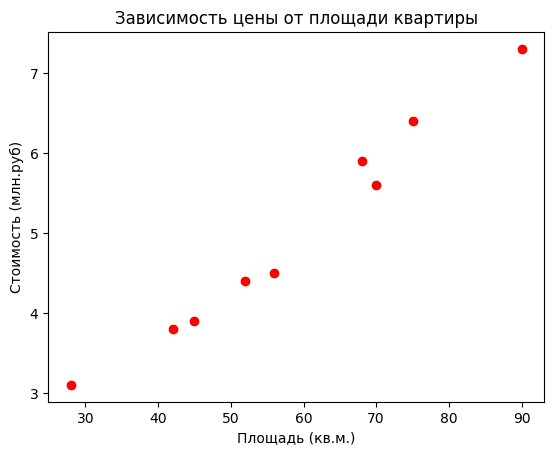

In [3]:
plt.scatter(df['area'], df['price'], color='red')
plt.xlabel('Площадь (кв.м.)')
plt.ylabel('Стоимость (млн.руб)')
plt.title('Зависимость цены от площади квартиры')
plt.show()

In [4]:
# Создание модели
reg = linear_model.LinearRegression()

# Обучение модели
reg.fit(df[['area']], df['price'])

LinearRegression()

In [5]:
# Прогноз для квартиры 38 м²
price_38 = reg.predict([[38]])
print(f"Стоимость квартиры 38 м²: {price_38[0]:.2f} млн.руб")

# Прогноз для квартиры 200 м²
price_200 = reg.predict([[200]])
print(f"Стоимость квартиры 200 м²: {price_200[0]:.2f} млн.руб")

# Прогноз для всех значений из датасета
predicted_prices = reg.predict(df[['area']])
print("Предсказанные цены:")
print(predicted_prices)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Стоимость квартиры 38 м²: 3.53 млн.руб


/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Стоимость квартиры 200 м²: 15.11 млн.руб
Предсказанные цены:
[2.81264744 3.81340081 4.02784796 4.52822464 4.81415417 5.67194277
 5.81490754 6.17231946 7.24455521]


In [6]:
print(f"Коэффициент a (наклон): {reg.coef_[0]:.4f}")
print(f"Коэффициент b (пересечение): {reg.intercept_:.4f}")

# Уравнение регрессии
print(f"Уравнение регрессии: price = {reg.coef_[0]:.4f} * area + {reg.intercept_:.4f}")

Коэффициент a (наклон): 0.0715
Коэффициент b (пересечение): 0.8111
Уравнение регрессии: price = 0.0715 * area + 0.8111


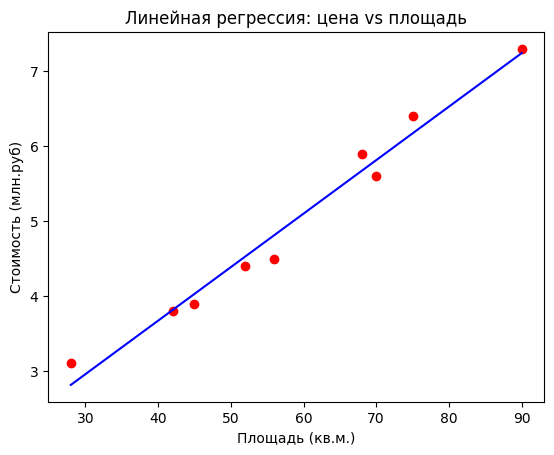

In [7]:
plt.scatter(df['area'], df['price'], color='red')
plt.plot(df['area'], reg.predict(df[['area']]), color='blue')
plt.xlabel('Площадь (кв.м.)')
plt.ylabel('Стоимость (млн.руб)')
plt.title('Линейная регрессия: цена vs площадь')
plt.show()

In [16]:
# Загрузка новых данных для прогнозирования
pred = pd.read_csv('prediction_price.csv', sep=';')

# Проверка и преобразование типов данных
if 'price' in pred.columns and pred['price'].dtype == object:
    pred['price'] = pred['price'].str.replace(',', '.').astype(float)

# Прогнозирование цен
p = reg.predict(pred[['area']])

# Добавление прогнозируемых цен в таблицу
pred['predicted_prices'] = p

# Вывод результатов
print(pred)

# Сохранение результатов в Excel
pred.to_excel('new.xlsx', index=False)

    area  predicted_prices
0     25          2.598200
1     37          3.455989
2     40          3.670436
3     58          4.957119
4     61          5.171566
5     67          5.600460
6     72          5.957872
7     85          6.887143
8     96          7.673450
9    105          8.316791
10   118          9.246062
